In [1]:
# import required libraries
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import matplotlib.pyplot as plt
from sklearn import tree
import seaborn as sns

In [2]:
# import data
data = pd.read_csv('parkinsons.data')

In [3]:
# split data to X and y
X = data.drop(['name','status'],axis=1)
# Check unique values in the 'status' column
y = data['status']

In [4]:
# split the dataset into training, validation, and testing sets
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.3, random_state=7,stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=7,stratify=y_train_val)


In [5]:
# scale the numerical features

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_val_scaled = scaler.transform(X_val)

In [12]:
# Define hyperparameter grid for tuning

param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 3, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a Decision Tree classifier
dt_classifier = DecisionTreeClassifier(random_state=7)

# Create GridSearchCV instance
grid_search = GridSearchCV(dt_classifier, param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best parameters and best estimator
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

{'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [7]:
# Predict on the test set
y_test_pred = best_model.predict(X_test)

# Evaluate the model on the test set
test_accuracy = accuracy_score(y_test, y_test_pred)
test_conf_matrix = confusion_matrix(y_test, y_test_pred)
test_class_report = classification_report(y_test, y_test_pred)

print(f"Test Accuracy: {test_accuracy:.2f}")
print("Test Confusion Matrix:\n", test_conf_matrix)
print("Test Classification Report:\n", test_class_report)

Test Accuracy: 0.97
Test Confusion Matrix:
 [[13  2]
 [ 0 44]]
Test Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.87      0.93        15
           1       0.96      1.00      0.98        44

    accuracy                           0.97        59
   macro avg       0.98      0.93      0.95        59
weighted avg       0.97      0.97      0.97        59



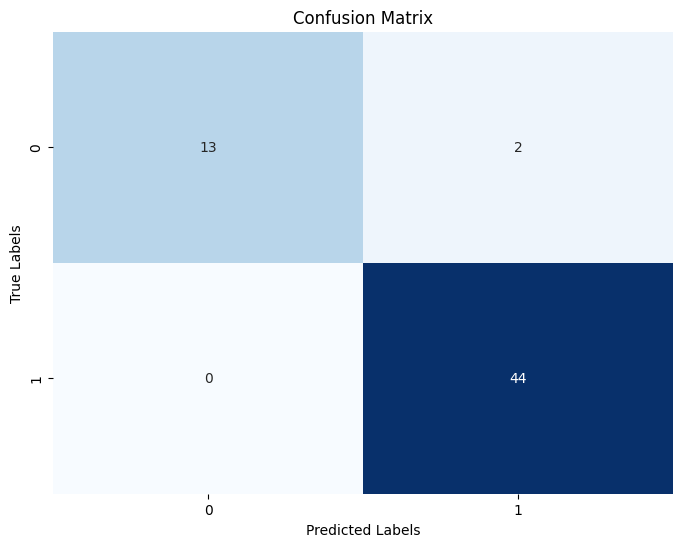

In [8]:
# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(test_conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [9]:
# U svakom čvora stabla naveden je test, zatim vrednost korišćene mere homogenosti, 
# ukupan broj instaci koji je analiziran, kao i broj instanci po klasama. 

plt.figure(figsize=(20, 10))
tree.plot_tree(best_model, fontsize=10, feature_names=list(X.keys()), filled=True, rounded=True, class_names=['0','1'])

[Text(0.5416666666666666, 0.9285714285714286, 'Jitter:DDP <= 0.005\nentropy = 0.803\nsamples = 102\nvalue = [25, 77]\nclass = 1'),
 Text(0.25, 0.7857142857142857, 'PPE <= 0.105\nentropy = 0.944\nsamples = 36\nvalue = [23, 13]\nclass = 0'),
 Text(0.16666666666666666, 0.6428571428571429, 'entropy = 0.0\nsamples = 12\nvalue = [12, 0]\nclass = 0'),
 Text(0.3333333333333333, 0.6428571428571429, 'MDVP:Fo(Hz) <= 133.587\nentropy = 0.995\nsamples = 24\nvalue = [11, 13]\nclass = 1'),
 Text(0.16666666666666666, 0.5, 'MDVP:Shimmer(dB) <= 0.102\nentropy = 0.65\nsamples = 12\nvalue = [10, 2]\nclass = 0'),
 Text(0.08333333333333333, 0.35714285714285715, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = 1'),
 Text(0.25, 0.35714285714285715, 'D2 <= 1.864\nentropy = 0.439\nsamples = 11\nvalue = [10, 1]\nclass = 0'),
 Text(0.16666666666666666, 0.21428571428571427, 'MDVP:Jitter(%) <= 0.003\nentropy = 1.0\nsamples = 2\nvalue = [1, 1]\nclass = 0'),
 Text(0.08333333333333333, 0.07142857142857142, 'entrop

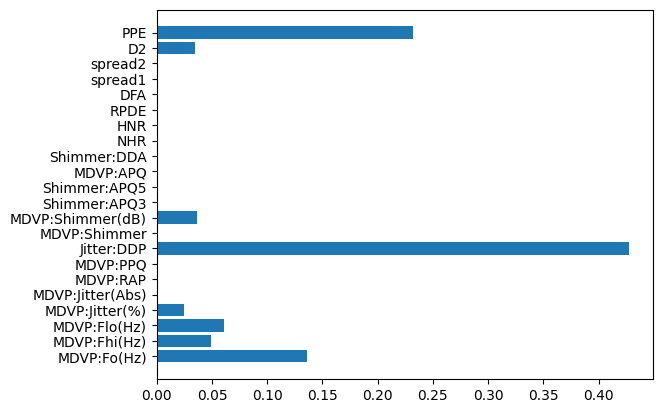

In [10]:
# Importance of features

plt.barh(list(X.keys()), best_model.feature_importances_)
plt.show()

In [11]:
# Save model
import pickle

with open('../models/decision_tree.model.pickle', 'wb') as model_file:
    pickle.dump(best_model, model_file)
    
with open('../models/decision_tree.scaler.pickle', 'wb') as model_file:
    pickle.dump(scaler, model_file)